# Homework 3
Rex Thompson

## Initial Setup and Data Import

In [122]:
# library imports and inline plot setting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [123]:
# data import
df = pd.read_csv("2015_trip_data.csv")

In [124]:
# pull out day of week
dayofweek_start = [pd.to_datetime(x).dayofweek for x in df.starttime]
dayofweek_stop = [pd.to_datetime(x).dayofweek for x in df.stoptime]

In [125]:
df['dayofweek_start'] = dayofweek_start
df['dayofweek_stop'] = dayofweek_stop

In [135]:
netBikes = pd.DataFrame({'From':df.groupby(['from_station_id','dayofweek_start']).size(),
                         'To':df.groupby(['to_station_id','dayofweek_stop']).size()})
netBikes['Net'] = netBikes['To']-netBikes['From']
netBikes.index.names = ['stationID','dayOfWeek']
netBikes.head()

From   To   Net
stationID dayOfWeek                  
BT-01     0          806.0  791 -15.0
          1          724.0  675 -49.0
          2          679.0  696  17.0
          3          801.0  791 -10.0
          4          921.0  853 -68.0

In [137]:
# drop counts from 'Pronto shop'
netBikes = netBikes.drop('Pronto shop')

In [138]:
def plot_bar1(df, column, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df: dataframe to plot
    :param str column: name of the column to plot
    :param dict opts: key is plot attribute
    """
    n_groups = len(df.index)
    index = np.arange(n_groups)  # The "raw" x-axis of the bar plot
    rects1 = plt.bar(index, df[column])
    if 'xlabel' in opts:
        plt.xlabel(opts['xlabel'])
    if 'ylabel' in opts:
        plt.ylabel(opts['ylabel'])
    if 'xticks' in opts and opts['xticks']:
        plt.xticks(index, df.index)  # Convert "raw" x-axis into labels
        _, labels = plt.xticks()  # Get the new labels of the plot
        plt.setp(labels, rotation=90)  # Rotate labels to make them readable
    else:
        labels = ['' for x in df.index]
        plt.xticks(index, labels)   
    if 'ylim' in opts:
        plt.ylim(opts['ylim'])
    if 'title' in opts:
        plt.title(opts['title'])

In [139]:
def plotStatsByDay(df, column, opts):
    """
    Plots statistics by station for every day of the week.
    :param pd.DataFrame df: dataframe of counts with indexes stationID and dayOfWeek
    :param str column: names of the column to plot
    :param dict opts: key is plot attribute
    """
    dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
    local_opts = dict(opts)  # Make a deep copy of the object
    idx = 0
    for day in range(7):
        dfSubset = df.xs(day, level=1)
        local_opts['title'] = dayOfWeek.get(idx)
        local_opts['xticks'] = False
        local_opts['xlabel'] = ''
        idx += 1
        if idx == 7:
            local_opts['xticks'] = True
            local_opts['xlabel'] = opts['xlabel']
        else:
            pass
        plt.subplot(7, 1, idx)
        plt.tight_layout()
        plot_bar1(dfSubset, column, local_opts)

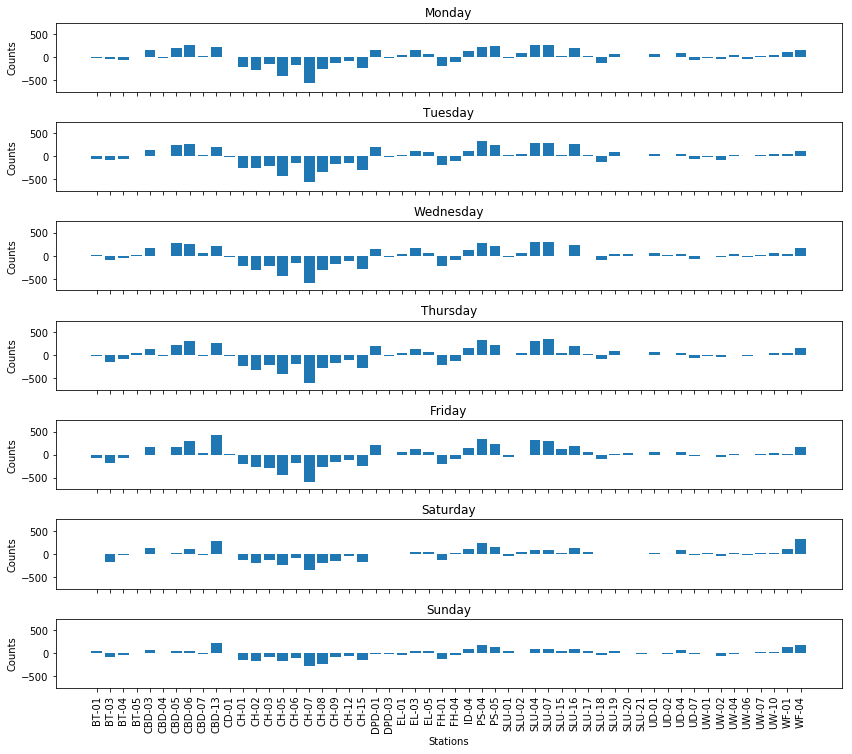

In [140]:
fig = plt.figure(figsize=(12, 10))  # Controls global properties of the bar plot
opts = {'xlabel': 'Stations', 'ylabel': 'Counts','ylim':[-750,750]}
plotStatsByDay(netBikes, 'Net', opts)

In [136]:
# TODO: Consider adding the following:
# - get counts of number of days of each day of week in year
# - Then join this to the netBikes table
# - Then divide netBikes by the count column
# - Then drop the count column. You now have averages for each day.